In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Familiar with data

In [2]:
# preparing data for cook 👨🏻‍🍳
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [3]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
print(train_labels[0])
print(train_data[0].shape)

9
(28, 28)


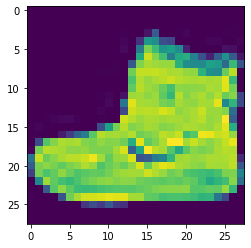

In [6]:
plt.imshow(train_data[0])

0


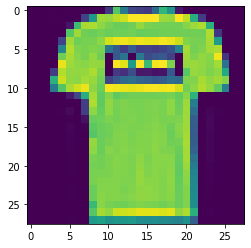

In [7]:
print(train_labels[1])
plt.imshow(train_data[1])

In [8]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

def show_indexing(index):
    class_index = train_labels[index]
    print(class_index)
    label = classes[class_index]
    plt.imshow(train_data[class_index])
    plt.title(f"{label}")

7


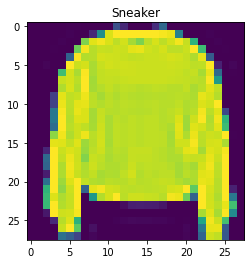

In [9]:
show_indexing(52)

# Building up the models

In [19]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

non_norm_history = model1.fit(train_data,train_labels,epochs=25,validation_data=(test_data,test_labels))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/25


2022-07-06 22:55:00.558485: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-06 22:55:00.558844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-06 22:55:00.701690: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  11/1875 [..............................] - ETA: 9s - loss: 16.0387 - accuracy: 0.1307  

2022-07-06 22:55:00.900488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 2.1780 - accuracy: 0.1626

2022-07-06 22:55:09.728535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 2.1769 - accuracy: 0.1626 - val_loss: 1.8039 - val_accuracy: 0.2066
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7187 - accuracy: 0.2407 - val_loss: 1.6656 - val_accuracy: 0.2878
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6392 - accuracy: 0.2819 - val_loss: 1.6069 - val_accuracy: 0.2839
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6041 - accuracy: 0.2910 - val_loss: 1.5991 - val_accuracy: 0.2972
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5955 - accuracy: 0.2979 - val_loss: 1.5903 - val_accuracy: 0.3190
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5816 - accuracy: 0.3088 - val_loss: 1.5638 - val_accuracy: 0.3024
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5681 - accuracy: 0.3200 - val_loss: 1.5638 - val_accuracy: 0.3248

In [20]:
# evaluate our model
model1.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.9131 - accuracy: 0.6433


[0.9131120443344116, 0.6433000564575195]

<AxesSubplot:>

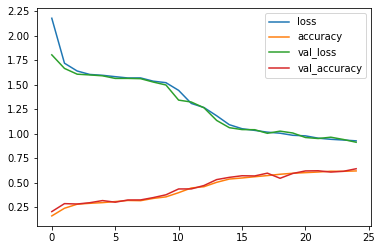

In [21]:
pd.DataFrame(non_norm_history.history).plot()

In [10]:
# try to normize our data
train_data_norm = train_data /255.0
test_data_norm = test_data /255.0
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [23]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_2_hist = model_2.fit(train_data_norm,train_labels,epochs=25,validation_data=(test_data_norm,test_labels))

Epoch 1/25
  23/1875 [..............................] - ETA: 8s - loss: 2.2343 - accuracy: 0.1644

2022-07-06 22:59:04.794851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 1.0973 - accuracy: 0.6272

2022-07-06 22:59:14.036352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 1.0966 - accuracy: 0.6275 - val_loss: 0.7959 - val_accuracy: 0.7328
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7063 - accuracy: 0.7535 - val_loss: 0.6690 - val_accuracy: 0.7627
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6184 - accuracy: 0.7861 - val_loss: 0.6178 - val_accuracy: 0.7841
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5817 - accuracy: 0.7986 - val_loss: 0.5948 - val_accuracy: 0.7950
Epoch 5/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5615 - accuracy: 0.8047 - val_loss: 0.5959 - val_accuracy: 0.7876
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5451 - accuracy: 0.8095 - val_loss: 0.5637 - val_accuracy: 0.8024
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5350 - accuracy: 0.8119 - val_loss: 0.5496 - val_accuracy: 0.80

In [24]:
model_2.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5216 - accuracy: 0.8197


[0.5216072797775269, 0.8197000622749329]

In [11]:
# try to optimize the learning rate

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

lr_sche = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4*10**(epoch/20))
model_3_hist = model_3.fit(train_data_norm,train_labels, epochs=50, validation_data=(test_data_norm,test_labels), callbacks=[lr_sche])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-07 16:17:46.526048: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-07 16:17:46.526356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2022-07-07 16:17:46.751216: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-07 16:17:46.942269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 1.9614 - accuracy: 0.2640

2022-07-07 16:17:55.657443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 1.9614 - accuracy: 0.2640 - val_loss: 1.7298 - val_accuracy: 0.3726 - lr: 1.0000e-04
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5277 - accuracy: 0.4900 - val_loss: 1.3838 - val_accuracy: 0.5817 - lr: 1.1220e-04
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2810 - accuracy: 0.6048 - val_loss: 1.2246 - val_accuracy: 0.6229 - lr: 1.2589e-04
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1625 - accuracy: 0.6389 - val_loss: 1.1399 - val_accuracy: 0.6506 - lr: 1.4125e-04
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0923 - accuracy: 0.6625 - val_loss: 1.0803 - val_accuracy: 0.6666 - lr: 1.5849e-04
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0382 - accuracy: 0.6829 - val_loss: 1.0311 - val_accuracy: 0.6857 - lr: 1.7783e-04
Epoch 7/50
1875/1875 [===================

<AxesSubplot:title={'center':'model_3'}>

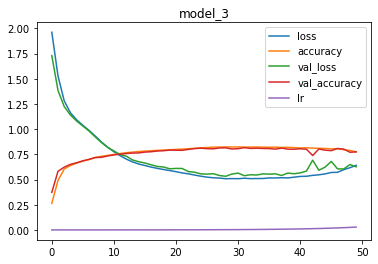

In [12]:
pd.DataFrame(model_3_hist.history).plot(title="model_3")
# pd.DataFrame(model_2_hist.history).plot(title="model_2")

In [13]:
# make a graph of lossest loss vs accuracy
learnR_vs_loss = pd.DataFrame(model_3_hist.history)
loss = learnR_vs_loss['loss']
loss

0     1.961400
1     1.527664
2     1.280983
3     1.162467
4     1.092331
5     1.038244
6     0.987115
7     0.931048
8     0.872432
9     0.820638
10    0.775481
11    0.736707
12    0.702456
13    0.674863
14    0.653621
15    0.638813
16    0.623407
17    0.610466
18    0.599507
19    0.588885
20    0.577801
21    0.565577
22    0.556109
23    0.544352
24    0.532910
25    0.523835
26    0.517520
27    0.514228
28    0.508027
29    0.509357
30    0.508199
31    0.512851
32    0.509062
33    0.509899
34    0.510248
35    0.515800
36    0.515430
37    0.518112
38    0.516046
39    0.523399
40    0.530830
41    0.532523
42    0.541326
43    0.546861
44    0.555654
45    0.570057
46    0.571673
47    0.597984
48    0.617247
49    0.640906
Name: loss, dtype: float64

Text(0, 0.5, 'Lossess')

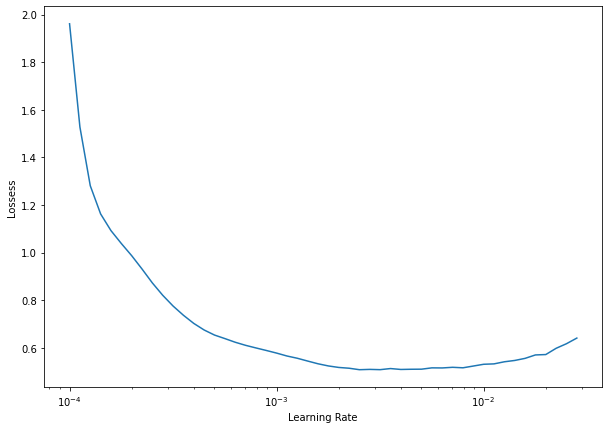

In [15]:
plt.figure(figsize=(10,7))
learning_rate = 1e-4* (10**(tf.range(50)/20))
graph = plt.semilogx(learning_rate, loss)
plt.xlabel("Learning Rate")
plt.ylabel("Lossess")

In [30]:
y_values = graph[0].get_ydata()
x_values = graph[0].get_xdata()

index = np.where(y_values == loss.min())

perfect_lr = x_values[index[0][0]]
perfect_lr.numpy()

0.0025118864315095794

In [31]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=perfect_lr.numpy()), metrics=['accuracy'])
model_4_hist = model_4.fit(train_data_norm,train_labels,epochs=25,validation_data=(test_data_norm,test_labels))

Epoch 1/25


/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


  24/1875 [..............................] - ETA: 8s - loss: 2.2046 - accuracy: 0.1927

2022-07-07 16:48:53.344925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1865/1875 [============================>.] - ETA: 0s - loss: 0.8280 - accuracy: 0.7129

2022-07-07 16:49:01.855071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.8270 - accuracy: 0.7133 - val_loss: 0.6338 - val_accuracy: 0.7820
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5962 - accuracy: 0.7968 - val_loss: 0.6031 - val_accuracy: 0.7907
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5607 - accuracy: 0.8056 - val_loss: 0.5777 - val_accuracy: 0.8032
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5416 - accuracy: 0.8130 - val_loss: 0.6265 - val_accuracy: 0.7868
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5318 - accuracy: 0.8166 - val_loss: 0.5593 - val_accuracy: 0.8152
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5227 - accuracy: 0.8188 - val_loss: 0.5679 - val_accuracy: 0.8057
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5146 - accuracy: 0.8214 - val_loss: 0.5651 - val_accuracy: 0.8074
E

In [35]:
hard_code_lr_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
hard_code_lr_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.0025118864315095794), metrics=['accuracy'])
hard_code_history = hard_code_lr_model.fit(train_data_norm,train_labels,epochs=25,validation_data=(test_data_norm,test_labels))

Epoch 1/25
  22/1875 [..............................] - ETA: 9s - loss: 2.2296 - accuracy: 0.1733

2022-07-07 16:56:38.977659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 1.0265 - accuracy: 0.6344

2022-07-07 16:56:47.644611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 1.0258 - accuracy: 0.6347 - val_loss: 0.8088 - val_accuracy: 0.7293
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7046 - accuracy: 0.7476 - val_loss: 0.6726 - val_accuracy: 0.7654
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6495 - accuracy: 0.7675 - val_loss: 0.6490 - val_accuracy: 0.7737
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6294 - accuracy: 0.7732 - val_loss: 0.6451 - val_accuracy: 0.7698
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6205 - accuracy: 0.7766 - val_loss: 0.6710 - val_accuracy: 0.7586
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6136 - accuracy: 0.7797 - val_loss: 0.6453 - val_accuracy: 0.7729
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6042 - accuracy: 0.7818 - val_loss: 0.6322 - val_accuracy: 0.7

In [36]:
hard_code_lr_model.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.6135 - accuracy: 0.7916


[0.6134781837463379, 0.7916000485420227]

In [62]:
y_pred = hard_code_lr_model.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [125]:
from sklearn.metrics import confusion_matrix
print(test_labels.shape)

# convert all the predition probabilities into integers
y_preds = y_pred.argmax(axis=1)

cf_matrix = confusion_matrix(y_true=test_labels, y_pred=y_preds)
cf_matrix

(10000,)


array([[741,  10,  34,  76,   4,   1, 127,   0,   7,   0],
       [  7, 941,  20,  28,   0,   0,   0,   2,   2,   0],
       [ 22,   6, 777,  11,  74,   1,  99,   1,   9,   0],
       [ 49,  23,  26, 788,   6,   2,  97,   2,   7,   0],
       [  0,   0, 231,  15, 540,   0, 202,   0,  12,   0],
       [  0,   2,   0,   4,   0, 895,   0,  43,  10,  46],
       [117,   6, 161,  66,  89,   0, 545,   0,  16,   0],
       [  0,   0,   0,   0,   0,  47,   0, 872,   0,  81],
       [  0,   5,  23,  18,  40,  18,  11,   6, 879,   0],
       [  0,   0,   0,   0,   0,  35,   1,  26,   0, 938]])

<AxesSubplot:title={'center':'Heat Map'}>

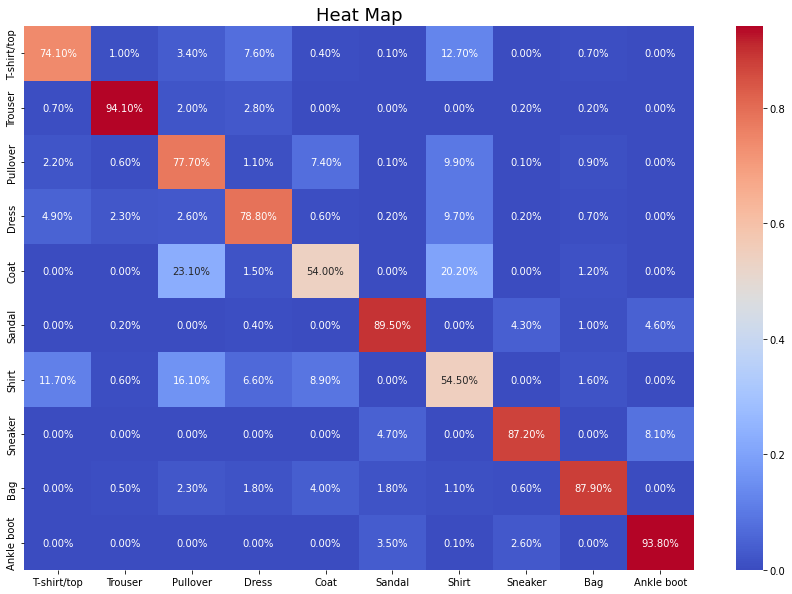

In [137]:
fig, ax = plt.subplots(figsize=(15,10))
# Add title to the Heat map
title = "Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

datasets = pd.DataFrame(cf_matrix/1000,index=classes, columns=classes)
sns.heatmap(datasets,ax=ax, cmap="coolwarm",fmt=".2%", annot=True)

## plt a image to show the model confidence

In [322]:
def plt_image_for_test():
    import random
    plt.figure(figsize=(8,8))
    selected = random.randint(0,len(test_data))
    actual_label =  classes[test_labels[selected]]
    plt.imshow(test_data[selected])
    pred_probs = hard_code_lr_model.predict(tf.reshape(test_data[selected],(1,28,28)))
    pred_label = classes[pred_probs.argmax(axis=1)[0]]
    if actual_label == pred_label:
        plt.xlabel(f"{pred_label} confidence: {pred_probs.max()*100:.2f}%", c='g')
    else:
        plt.xlabel(f"{pred_label} confidence: {pred_probs.max()*100:.2f}% \n True : {actual_label}",c='r')

1/1 [==============================] - 0s 12ms/step


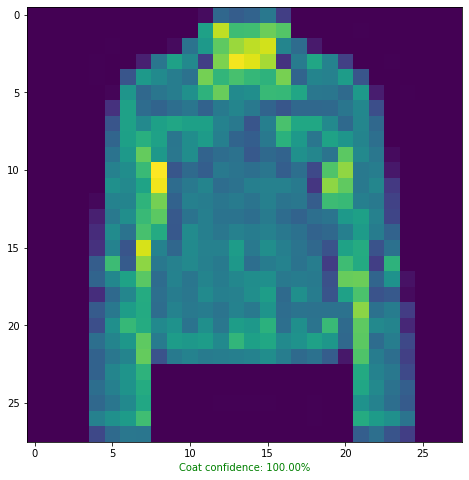

In [323]:
plt_image_for_test()

# Creaking the Model